In [16]:
import pandas as pd
from scipy.io import loadmat
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [2]:
mnist_raw = loadmat('mnist-original.mat')
mnist = {
    "data" : mnist_raw["data"].T,
    "target":mnist_raw["label"][0],
    "COL_NAMES":["label","data"],
    "DESCR":"mldata.org dataset:mnist-original",
}

In [3]:
X,y = mnist['data'],mnist['target']

In [4]:
X.shape

(70000, 784)

In [5]:
y

array([0., 0., 0., ..., 9., 9., 9.])

### scaling the data

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.astype(np.float64))
print(X_scaled)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## applying PCA for dimensionality reduction

In [7]:
pca = PCA()
X_scaled_new = pca.fit_transform(X_scaled)

In [8]:
X_scaled_new.shape

(70000, 784)

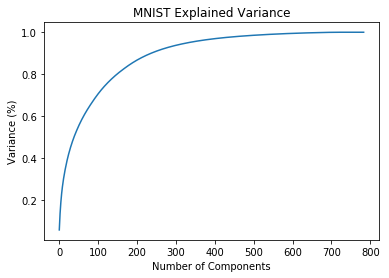

In [9]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('MNIST Explained Variance')
plt.show()

## based on the graph above we can set the ncomponents to be around 300

#### check out this link for reference : https://towardsdatascience.com/an-approach-to-choosing-the-number-of-components-in-a-principal-component-analysis-pca-3b9f3d6e73fe

In [10]:
pca = PCA(n_components=25)
X_scaled_new = pca.fit_transform(X_scaled)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled_new,y,test_size = 0.30,random_state = 42)

In [15]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_train_score = dtree.score(X_train,y_train)
dtree_test_score = dtree.score(X_test,y_test)
print("train score",dtree_train_score)
print("test score",dtree_test_score)

y_pred_dtree = dtree.predict(X_test)
acc_dtree = accuracy_score(y_test,y_pred_dtree)
print("accuracy using sklearn",acc_dtree)


train score 1.0
test score 0.8391428571428572
accuracy using sklearn 0.8391428571428572


In [17]:
cm = confusion_matrix(y_test, y_pred_dtree)

[[1800    2   32   14   19   53   36   10   34   13]
 [   2 2222   19   19    2    6    7   12   18   13]
 [  27   30 1778   78   28   30   28   38   85   18]
 [  15   20   67 1688    8  107   11   33  106   43]
 [  19    5   20   16 1687   24   32   38   31  175]
 [  59    7   28  120   38 1499   46   27  104   43]
 [  38    6   30   10   32   31 1901    8   29    7]
 [  11   14   37   34   40   13    4 1876   40  137]
 [  20   26   65  113   34   99   26   26 1598   45]
 [  15    8   15   41  165   45    2  150   47 1573]]
